# Importing packages and Data

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('fraud_prediction.csv')

# Setting up Data for Model

In [7]:
features= df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

# Running Model

In [8]:
logistic_regression = linear_model.LogisticRegression()
logistic_regression.fit(X_train, y_train)

print( "{0:.2%}".format(logistic_regression.score(X_test,y_test)))

58.94%


# Finding Optimized Hyperparameters

In [9]:
logistic_regression = linear_model.LogisticRegression(penalty ='l1')

grid = GridSearchCV(logistic_regression, {'C':[0.0001,0.001,0.01,0.1,10]})
grid.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

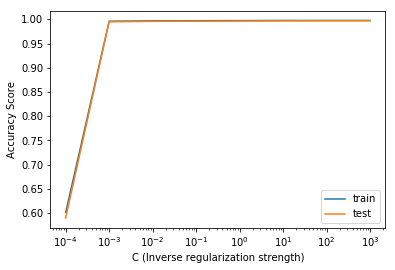

In [10]:
train_errors = []
test_errors = []

C_list = [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]

# Evaluate the training and test classification errors for each value of C

for value in C_list:
    
    # Create LogisticRegression object and fit
    logistic_regression = linear_model.LogisticRegression(C= value, penalty = 'l1')
    logistic_regression.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errors.append(logistic_regression.score(X_train, y_train) )
    test_errors.append(logistic_regression.score(X_test, y_test))
    
# Plot results
plt.semilogx(C_list, train_errors, C_list, test_errors)
plt.legend(("train", "test"))
plt.ylabel('Accuracy Score')
plt.xlabel('C (Inverse regularization strength)')
plt.show()

# Re-fitting Model 

In [ ]:
logistic_regression_ = linear_model.LogisticRegression(C = 10, penalty = 'l1')

logistic_regression.fit(X_train, y_train)

# Re-running Model with Optimized Hyperparameters

In [ ]:
print( "{0:.2%}".format(logistic_regression.score(X_test,y_test)))

# Third Model Iteration with Optimized Hyperparameters and Standarized Variables

In [ ]:
pipeline_order = [('scaler', StandardScaler()), ('logistc_reg',linear_model.LogisticRegression(C = 20, penalty = 'l1'))]

pipeline = Pipeline(pipeline_order)

logistic_regression_scaled = pipeline.fit(X_train, y_train)

print( "{0:.2%}".format(logistic_regression_scaled.score(X_test, y_test)))